## Importing necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set file path and load the CSV


In [6]:
filepath = os.path.join('data', 'amazon_sales_data 2025.csv')

In [10]:
df = pd.read_csv(filepath, sep= ',', low_memory=False)

## Preview and inspect the dataset

In [11]:
df.head() # Show first 5 rows

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [17]:
df.columns # Display all column names

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [12]:
df.shape # Display number of rows and columns

(250, 11)

In [13]:
df.info() # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [16]:
df.isnull().any() # Check for any null values in the DataFrame

Order ID             False
Date                 False
Product              False
Category             False
Price                False
Quantity             False
Total Sales          False
Customer Name        False
Customer Location    False
Payment Method       False
Status               False
dtype: bool

In [29]:
df.duplicated().any() # Check for any duplicate rows in the DataFrame

np.False_

## Explore unique values in important columns

In [23]:
unique_products = df['Product'].unique()
print(f"Unique products: {unique_products}")

Unique products: ['Running Shoes' 'Headphones' 'Smartwatch' 'T-Shirt' 'Smartphone' 'Book'
 'Jeans' 'Laptop' 'Washing Machine' 'Refrigerator']


In [24]:
unique_categories = df['Category'].unique()
print(f"Unique categories: {unique_categories}")

Unique categories: ['Footwear' 'Electronics' 'Clothing' 'Books' 'Home Appliances']


In [25]:
unique_payment_methods = df['Payment Method'].unique()
print(f"Unique payment methods: {unique_payment_methods}")

Unique payment methods: ['Debit Card' 'Amazon Pay' 'Credit Card' 'PayPal' 'Gift Card']


In [26]:
unique_status = df['Status'].unique()
print(f"Unique status: {unique_status}")

Unique status: ['Cancelled' 'Pending' 'Completed']


In [28]:
# Total sales across all records

total_sales = df['Total Sales'].sum()
print(f"Total sales: {total_sales}")

Total sales: 243845


In [30]:
# Summary statistics

df.describe(include='all')

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
count,250,250,250,250,250.000000,250.000000,250.000000,250,250,250,250
unique,250,60,10,5,NaN,NaN,NaN,10,10,5,3
top,ORD0001,10-02-25,Smartphone,Electronics,NaN,NaN,NaN,Emma Clark,Houston,PayPal,Completed
freq,1,10,35,118,NaN,NaN,NaN,32,32,60,88
mean,NaN,NaN,NaN,NaN,343.580000,2.856000,975.380000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,380.635808,1.429489,1252.112254,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,15.000000,1.000000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,2.000000,100.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,150.000000,3.000000,400.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,600.000000,4.000000,1500.000000,NaN,NaN,NaN,NaN


In [31]:
# Product-level sales: Top 10

product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print(product_sales.head(10))

Product
Refrigerator       78000
Laptop             58400
Smartphone         48500
Washing Machine    27000
Smartwatch         15750
Headphones          7300
Running Shoes       4320
Jeans               2480
T-Shirt             1060
Book                1035
Name: Total Sales, dtype: int64


In [32]:
# Category-level sales

category_sales = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
print(category_sales)

Category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: Total Sales, dtype: int64


In [39]:
# Customer-product quantity (how much of each product each customer bought)

customer_product_quantity = df.groupby(['Customer Name', 'Product'])['Quantity'].sum().reset_index()
print(customer_product_quantity.sort_values(by='Quantity', ascending=False))

    Customer Name          Product  Quantity
40     Emma Clark    Running Shoes        20
18      David Lee             Book        19
80  Olivia Wilson       Smartphone        18
48     Jane Smith           Laptop        16
34  Emily Johnson       Smartwatch        16
..            ...              ...       ...
15  Daniel Harris       Smartphone         2
60       John Doe    Running Shoes         2
27  Emily Johnson             Book         1
63       John Doe          T-Shirt         1
64       John Doe  Washing Machine         1

[92 rows x 3 columns]


In [43]:
# Customer-product total sales (how much each customer spent on each product)

customer_total_psale = df.groupby(['Customer Name', 'Product'])['Total Sales'].sum().reset_index()
print(customer_total_psale.sort_values(by='Total Sales', ascending=False))

    Customer Name       Product  Total Sales
21      David Lee  Refrigerator        14400
78  Olivia Wilson  Refrigerator        14400
48     Jane Smith        Laptop        12800
59       John Doe  Refrigerator        10800
38     Emma Clark        Laptop         9600
..            ...           ...          ...
91  Sophia Miller       T-Shirt           60
72  Michael Brown       T-Shirt           40
25      David Lee       T-Shirt           40
63       John Doe       T-Shirt           20
27  Emily Johnson          Book           15

[92 rows x 3 columns]


In [44]:
# Total sales per customer

customer_total_sale = df.groupby(['Customer Name'])['Total Sales'].sum().reset_index()
print(customer_total_sale.sort_values(by='Total Sales', ascending=False))

   Customer Name  Total Sales
8  Olivia Wilson        36170
5     Jane Smith        31185
4     Emma Clark        29700
6       John Doe        26870
3  Emily Johnson        23475
2      David Lee        22665
7  Michael Brown        22655
1  Daniel Harris        18945
0    Chris White        18885
9  Sophia Miller        13295


In [82]:
location_status_counts = (
    df[df['Status'].isin(['Completed', 'Cancelled'])]
    .groupby(['Customer Location', 'Status'])
    .size()
    .unstack(fill_value=0)
    .sort_values(by='Completed', ascending=False)
)

location_status_counts

Status,Cancelled,Completed
Customer Location,,
Houston,7,17
Boston,7,10
Denver,9,10
Dallas,11,10
Miami,12,10
Chicago,5,7
Los Angeles,9,7
Seattle,5,7
New York,9,6


In [83]:
# Count total and cancelled status per location
total_orders = df.groupby('Customer Location').size()
cancelled_orders = df[df['Status'] == 'Cancelled'].groupby('Customer Location').size()

# Calculate cancellation rate
cancellation_rate = (cancelled_orders / total_orders).sort_values(ascending=False).dropna()
cancellation_rate

Customer Location
Los Angeles      0.529412
Miami            0.387097
Dallas           0.379310
Denver           0.346154
New York         0.346154
Boston           0.269231
Chicago          0.227273
Seattle          0.227273
Houston          0.218750
San Francisco    0.157895
dtype: float64

In [84]:
# Count Completed status per location
total_orders = df.groupby('Customer Location').size()
completed_orders = df[df['Status'] == 'Completed'].groupby('Customer Location').size()

# Calculate order success rate
success_rate = (completed_orders / total_orders).sort_values(ascending=False).dropna()
success_rate

Customer Location
Houston          0.531250
Los Angeles      0.411765
Denver           0.384615
Boston           0.384615
Dallas           0.344828
Miami            0.322581
Chicago          0.318182
Seattle          0.318182
New York         0.230769
San Francisco    0.210526
dtype: float64

In [86]:
# Countries with highest sales

highest_sales_countries = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False).head(10)
print(highest_sales_countries)

Customer Location
Miami            31700
Denver           29785
Houston          28390
Dallas           27145
Seattle          26890
Boston           26170
Chicago          20810
New York         18940
Los Angeles      17820
San Francisco    16195
Name: Total Sales, dtype: int64


In [94]:
# highest sales by date 

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.sort_values(ascending=False).head(10)

Date
2025-03-01    78295
2025-02-01    77610
2025-06-01    21120
2025-10-01    14930
2025-04-01    12715
2025-07-01    11180
2025-05-01     8300
2025-11-01     4790
2025-08-01     4765
2025-12-01     4270
Name: Total Sales, dtype: int64

## Data Visualization 

In [ ]:
# Set style
sns.set_theme(style="whitegrid")

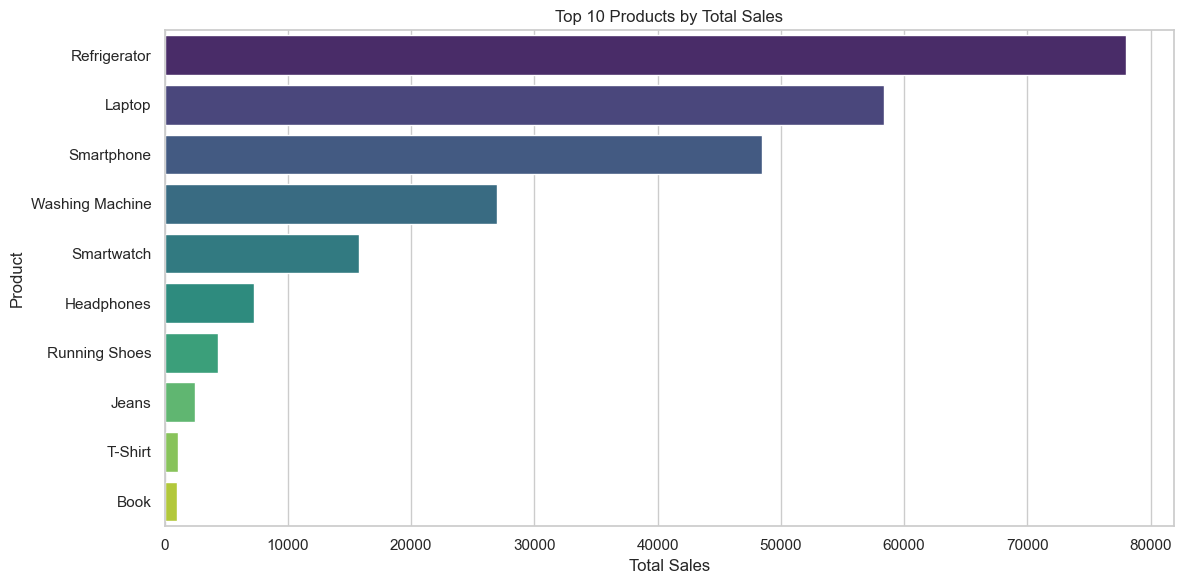

In [89]:
# 1. Top 10 Products by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, hue= product_sales.index, palette="viridis")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

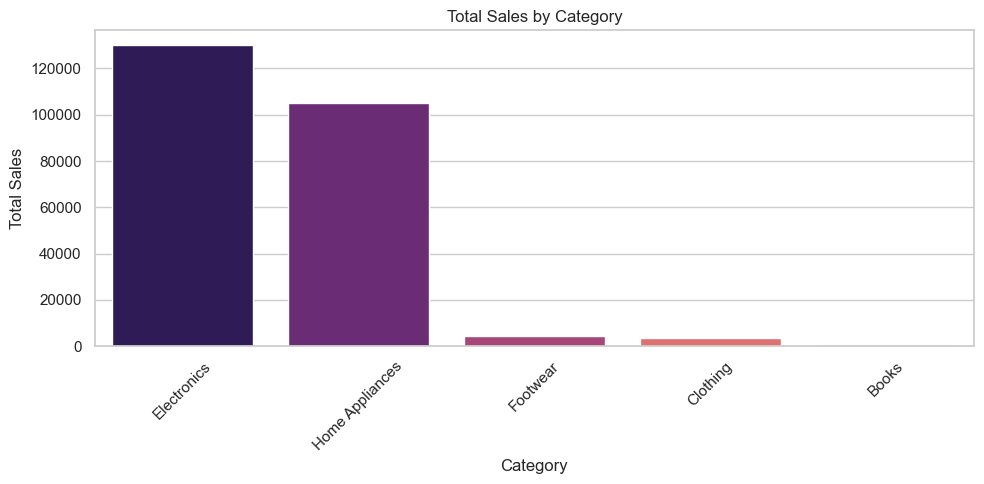

In [49]:
# 2. Sales by Category
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, hue= category_sales.index, palette="magma")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

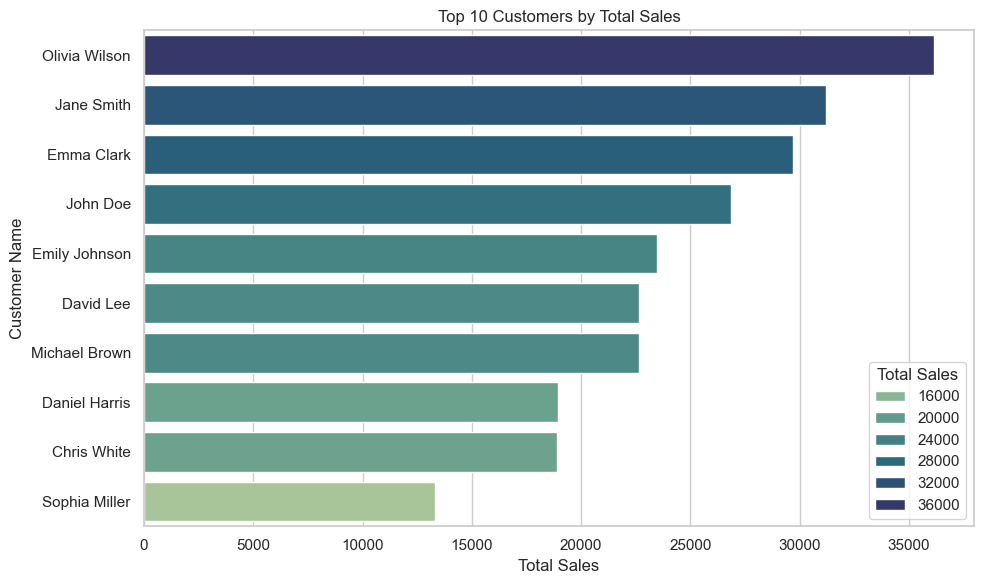

In [67]:
# 3. Top customers by total sales
top_customers = customer_total_sale.sort_values(by='Total Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sales', y='Customer Name', hue= 'Total Sales',  data=top_customers, palette='crest')
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

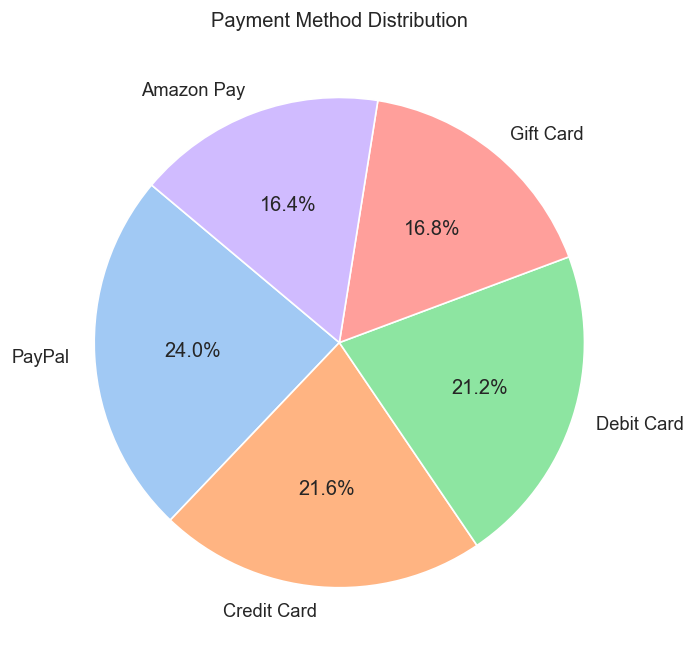

In [55]:
# 4. Payment Method Distribution
plt.figure(figsize=(6, 6), dpi=120)
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Payment Method Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

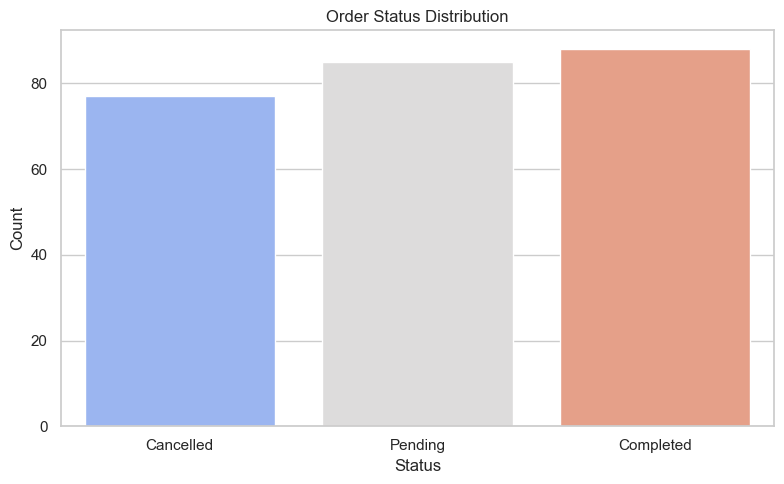

In [61]:
# 5. Order Status Count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Status', hue='Status', palette='coolwarm', legend=False)
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

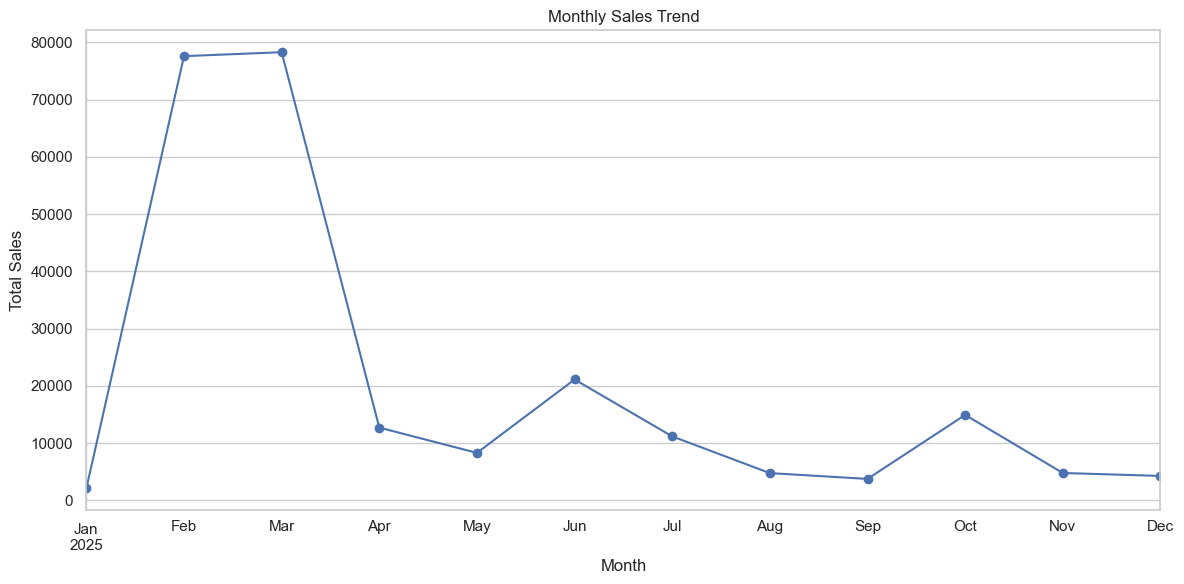

In [95]:
## 6. Sale Trend Over Time
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

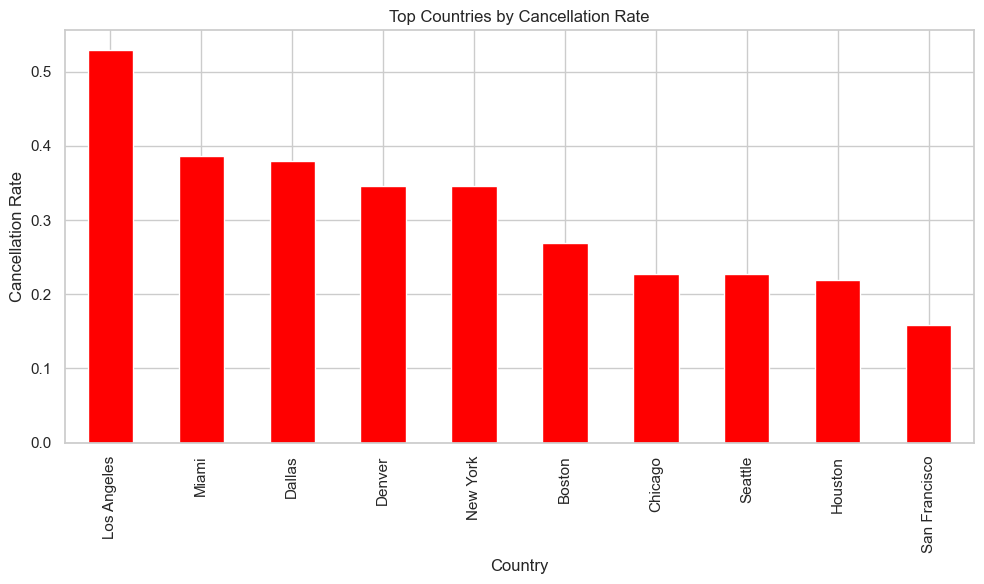

In [81]:
## 7. Top 10 Countries by Cancellation Rate
plt.figure(figsize=(10, 6))
cancellation_rate.head(10).plot(kind='bar', color='red')
plt.title("Top Countries by Cancellation Rate")
plt.xlabel("Country")
plt.ylabel("Cancellation Rate")
plt.tight_layout()
plt.show()

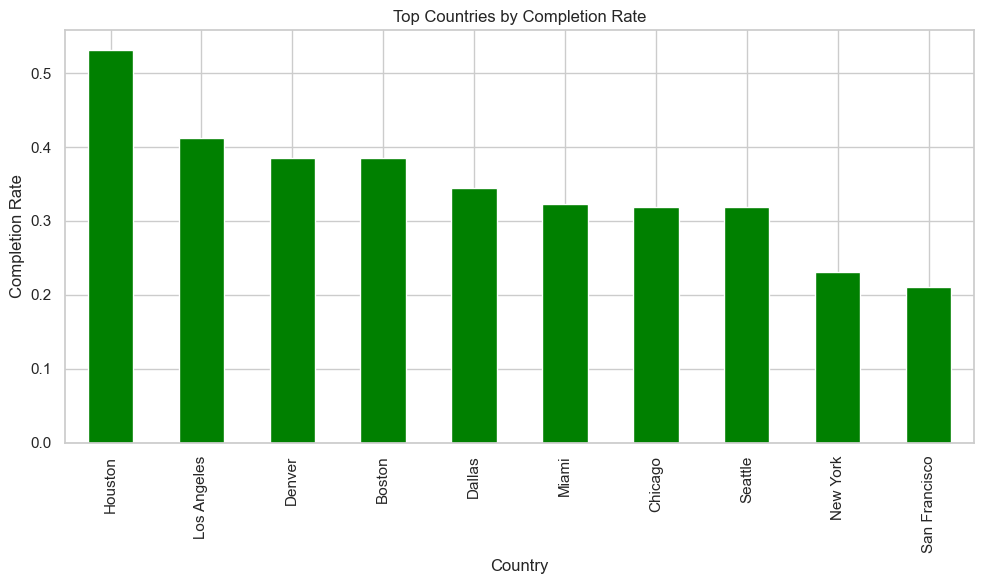

In [85]:
## 8. Top 10 Countries by Completion Rate
plt.figure(figsize=(10, 6))
success_rate.head(10).plot(kind='bar', color='green')
plt.title("Top Countries by Completion Rate")
plt.xlabel("Country")
plt.ylabel("Completion Rate")
plt.tight_layout()
plt.show()

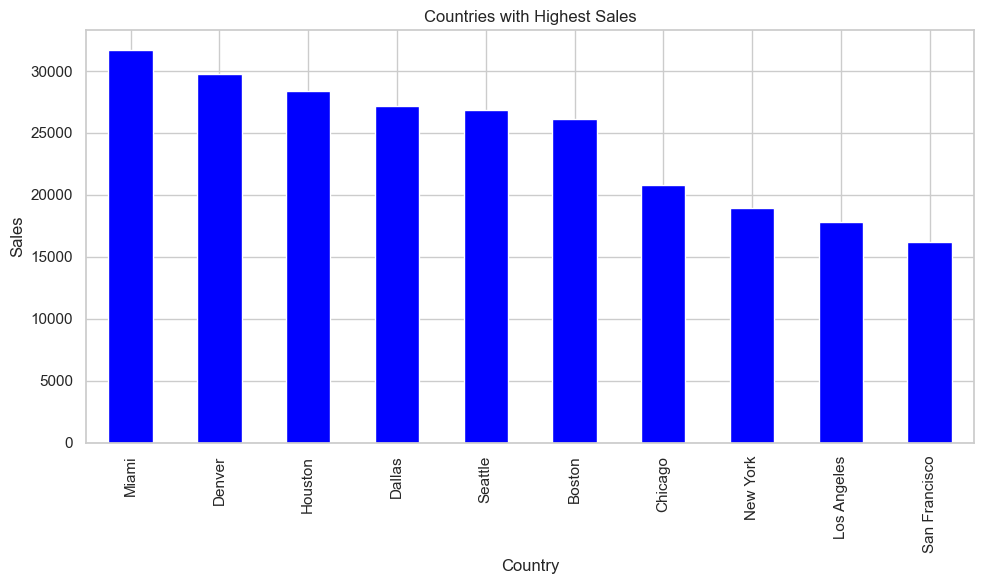

In [87]:
## 9. Countries with the highest sales
plt.figure(figsize=(10, 6))
highest_sales_countries.plot(kind='bar', color='blue')
plt.title("Countries with Highest Sales")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()